# Bank Churn Prediction

# 1. <a name = "link1"></a> Problem Statement

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.
 
 In this notebook, I am using neural network model to predict whether a customer will leave the bank. The dataset contains various independent variables such as `Age`, `Gender`, `Geography`, `Estimated Salary` etc. that are being analyzed. The data will be trained with multilayer neurons and perform hyperparameter tuning to improve model performance.
 
## Objective:

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.


## Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer 
* CreditScore: It defines the credit history of the customer.  
* Geography: A customer’s location    
* Gender: It defines the Gender of the customer   
* Age: Age of the customer     
* Tenure: Number of years for which the customer has been with the bank
* NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
* Balance: Account balance
* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
* EstimatedSalary: Estimated salary 
* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
* Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )

## Index


- <a href = #link1># Problem Statement </a>

- <a href = #link2># Loading libraries </a>


- <a href = #link3># Loading and exploring the data </a> 


- <a href = #link4># Data Exploratory Analysis </a>


- <a href = #link5># Data Pre-processing </a> 


- <a href = #link6># Problem Statement Model Building </a>


- <a href = #link7># Model building - Neural Network </a>


- <a href = #link8># Model Building - XG Boost </a>


- <a href = #link9># DNN Model Performance Improvement with Oversampling </a>

- <a href = #link10># DNN Model Performance Improvement with Hyperparameter Tuning </a>

- <a href = #link11># Conclusion</a>

# 2. <a name = "link2"></a>Loading libraries

In [223]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.impute import KNNImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam


from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from mlxtend.plotting import plot_confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE

In [224]:
!pip install tensorflow

In [225]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.6.0


# 3. <a name = "link3"></a>Loading and exploring the data
In this section the goal is to load the data into dataframe and check its basic properties. This will include the dimension, column types and names, and missingness counts.

In [226]:
#Defining the path of the dataset
project_path = '/content/drive/My Drive/'
dataset_file = project_path + 'bank.csv'

In [227]:
#mouting the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [228]:
#reading dataset
bank = pd.read_csv(dataset_file)
df = bank.copy()

In [229]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [230]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


The column `Exited` is the target variable for prediction and rest of the columns are independent variables. The data include customer demographic information (Age, EstimatedSalary,Gender, Geography, marital status etc.), the customer's account information(Balance, Tenure, CreditScore), the customer's transaction with the bank(NumOfProducts, HasCrCard, IsActiveMember) and the customer's recent account status (Exited).From the random 5 head and tail rows, I don't see any missing values but needs futher investigation to check the data quality.

In [231]:
df.shape
print("Dataset contains", df.shape[0], "sample points and", df.shape[1], "distinct features of customer information")

Dataset contains 10000 sample points and 14 distinct features of customer information


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Dataset contains Int, float and object types. We will look at the data type conversion if needed at later stage.

In [233]:
pd.DataFrame(
    data={
        "% of Missing Values": round(df.isna().sum() / df.isna().count() * 100, 2)
    }
)

,% of Missing Values
RowNumber,0.00
CustomerId,0.00
Surname,0.00
CreditScore,0.00
Geography,0.00
Gender,0.00
Age,0.00
Tenure,0.00
Balance,0.00
NumOfProducts,0.00


It appears that there are no missing values in the dataset. However need to investigate further to the column unique values to see if imputation is necessary.

In [234]:
df.apply(lambda x: len(x.unique()))

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

The `RowNumber`, `Surname` and `CustomerId` columns does not add any interesting information. There is no association between `RowNumber`, `Surname` and `CustomerId` with `Exited`. Also, it does not provide any general conclusion for future potential customers attrition. We can ignore these columns for our model prediction.

In [235]:
# Making a list of all binary variables
bin_col = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
bin_col = bin_col.columns

# Printing number of count of each unique value in each column
for column in bin_col:
    print(column)
    print(df[column].value_counts())
    print("-" * 50)

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64
--------------------------------------------------
Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
--------------------------------------------------
Gender
Male      5457
Female    4543
Name: Gender, dtype: int64
--------------------------------------------------
Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64
--------------------------------------------------
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
--------------------------------------------------
Balance
0.00         3617
105473.74       2
130170.82       2
113063.83       1
80242.37        1
            

In [236]:
#checking the percentage of each class in the dataset
(df.Exited.value_counts())/(df.Exited.count())

0   0.80
1   0.20
Name: Exited, dtype: float64

80% customers did not leave the bank
 
20% customers left the bank

This shows a complete imbalance of classes. There are 80% customers who did not exit and 20% customers who extited. This means that we are aiming to predict anomalous events.

In [237]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

#### Summary of Dataset

In [238]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48
Exited,10000.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00


* `Age`:  Mean and median age of customers are around 38 which indicates there is normal distribution of age.
* `CreditScore`: CreditScore have a wide range from 350 to 850. On average, a customer has 650 credit score. 75% of the customers have 718 score.
* `Tenure` : Mean and Median tenure is 5 years and it varies from 0 to 10 years.
* `Balance` : Balance looks to be right skewed as there is a big difference betwen the Mean and Median balance. Also, 75% customers has less than 127644.24 balance and the max balance is 250898.
* `NumOfProducts` : Customers use between 1 and 4 products offered
* `HasCrCard` : 25% customers does not have a credit card. There is skewness as the mean and median varies
* `IsActiveMember`: 25% customers are not active memeber. There is skewness as the mean and median varies
* `EstimatedSalary`: Mean is 100090.24. 75% customers have 149388.25 as estimated salary, it shows 75% of customers have actively used the credit card.

In [239]:
df.describe(include=['object']).T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


**Observations**
* Most of the customers are Male.
* Most of the customers are from France.

# 4. <a name = "link4"></a>Data Exploratory Analysis

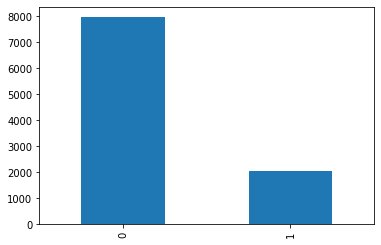

In [240]:
#visual representation of instances per class
df.Exited.value_counts().plot.bar()

Above plot represent the high class imbalance of the dataset. We need to up or downsample the data while model building to see if it changes the score accuracy

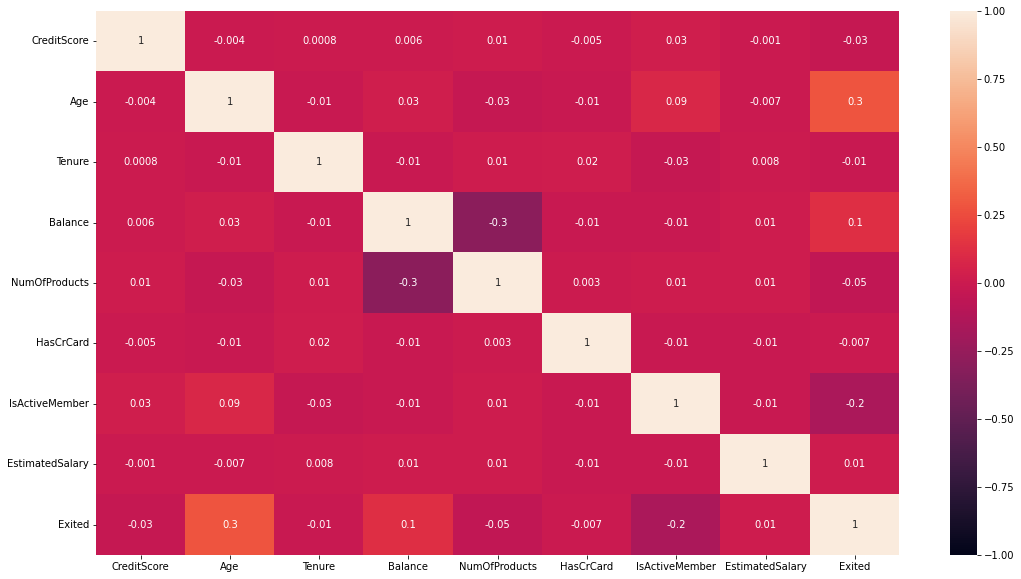

In [241]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g')
plt.show()

* Postive correlation between `Age`,`Balance` and `Exited`, shows that customers age has an influence on churning. Also it indicates higher  the balance higher the chance of them staying with the bank
* `EstimatedSalary` have no correlation
* `CreditScore`, `Tenure`, `NumofProducts`, `HasCrCard`, `IsActiveMember` have negative correlation
* There is no multi-colinearity between independent variables

### 4.1 Univariate Analysis

In [242]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

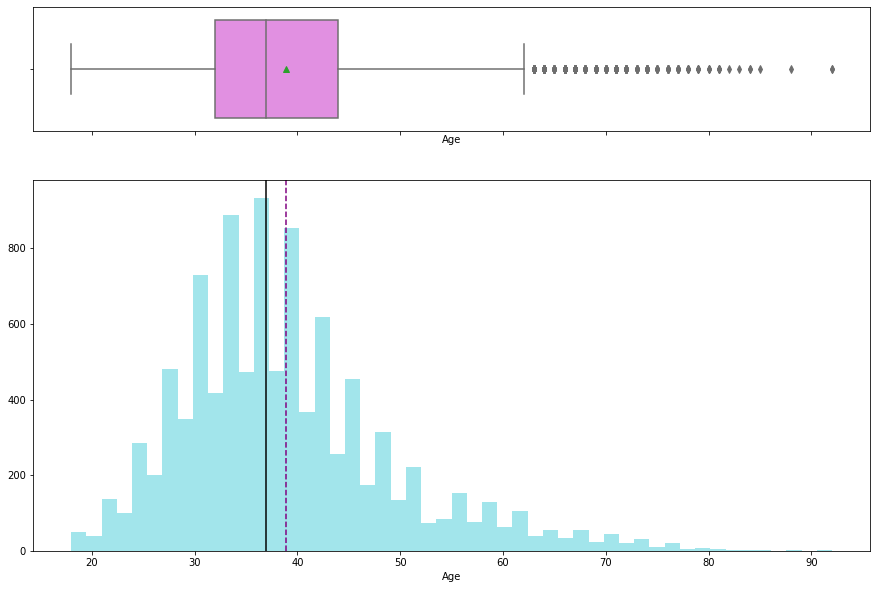

In [243]:
histogram_boxplot(df["Age"])

Age is right skewed with some outliers to the right. There is a difference between Mean and Median age

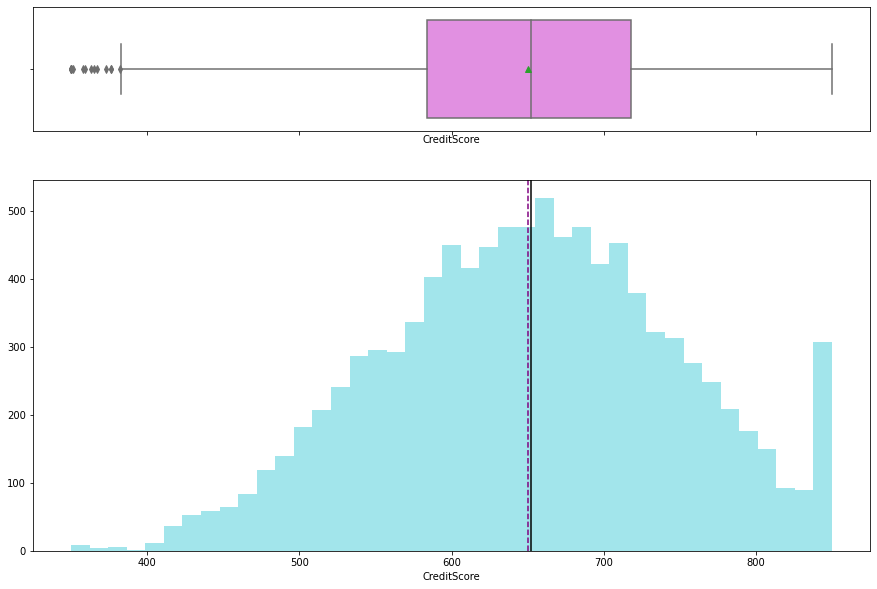

In [244]:
histogram_boxplot(df["CreditScore"])

Creditscore seems normally distributed with median and mean almost the same. There are few outliers to the left

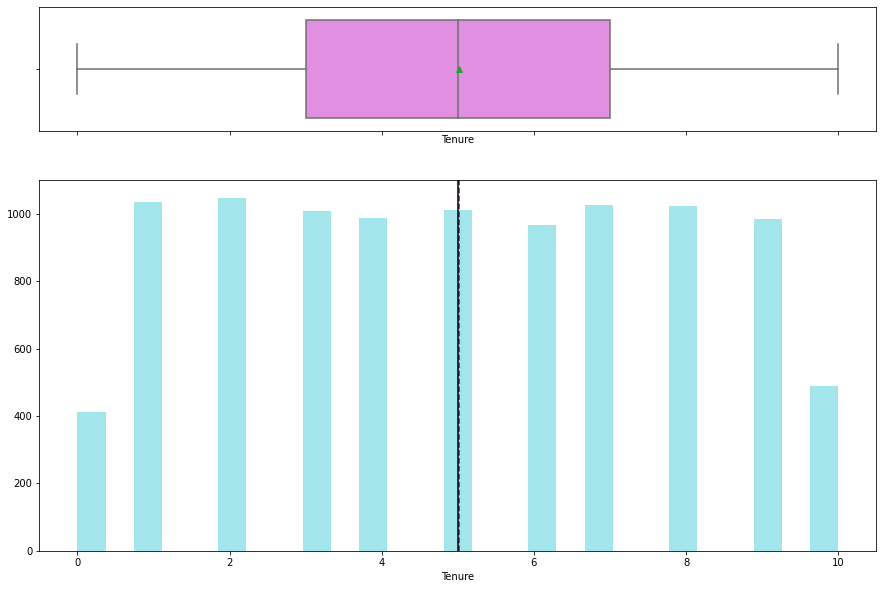

In [245]:
histogram_boxplot(df["Tenure"])

Tenure looks normally distributed with no outliers

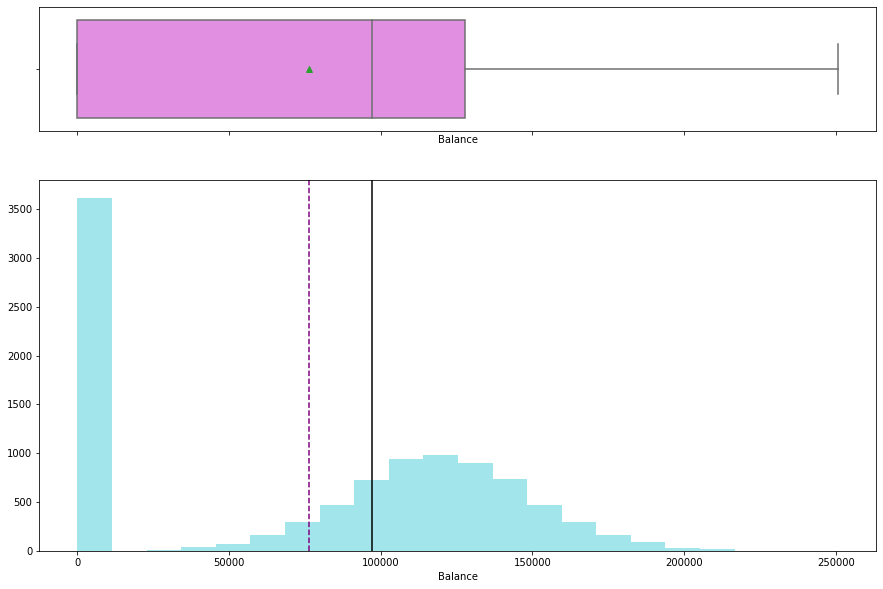

In [246]:
histogram_boxplot(df["Balance"])

Balance is right skewed with big difference between median and median

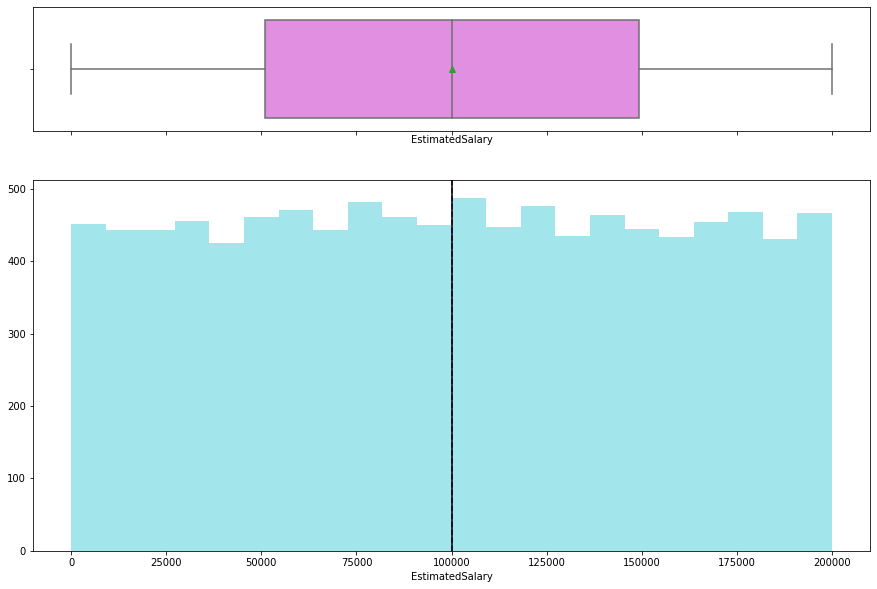

In [247]:
histogram_boxplot(df["EstimatedSalary"])

Estimatedsalary is normally distributed with no outliers

### 4.2 Bivariate Analysis

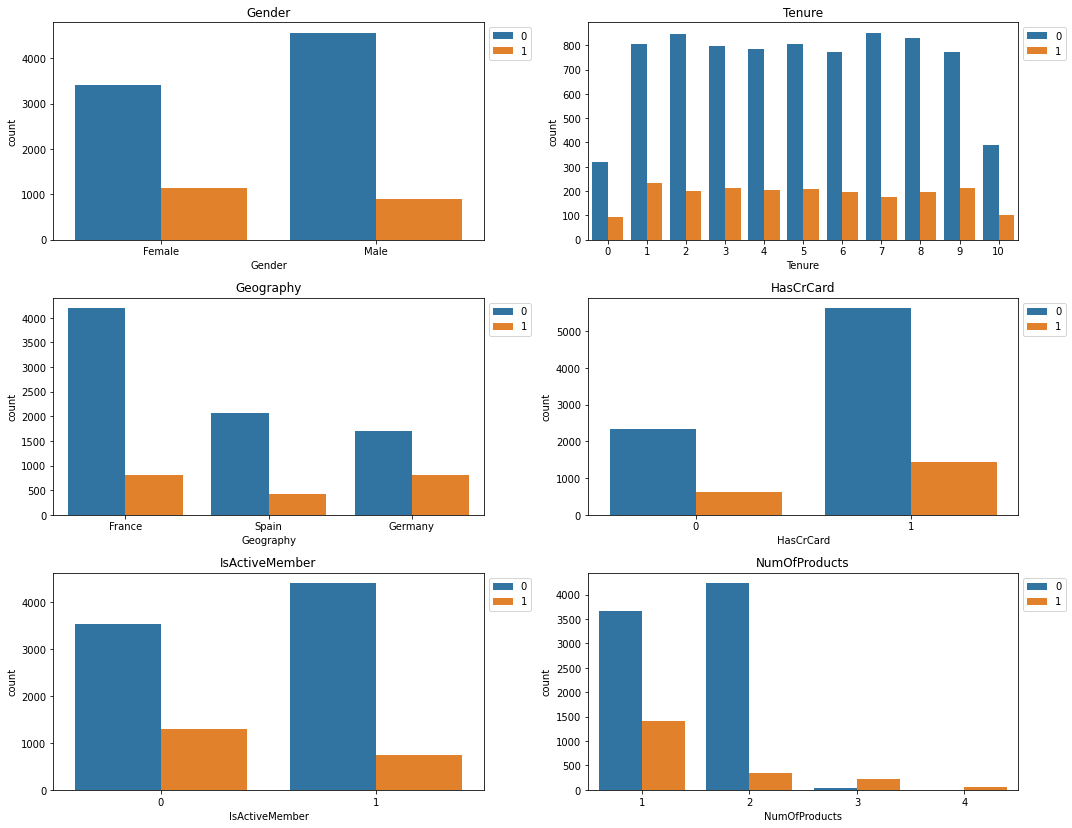

In [248]:
cols = df[['Gender','Tenure','Geography','HasCrCard','IsActiveMember','NumOfProducts']].columns.tolist()
plt.figure(figsize=(15,15))

for i, variable in enumerate(cols):
                     plt.subplot(4,2,i+1)
                     sns.countplot(df[variable],hue=df['Exited'])
                     plt.tight_layout()
                     plt.legend(loc="upper left", bbox_to_anchor=(1,1))
                     plt.title(variable)
plt.show()

* Data suggests that Female customers exited more than Male customers. However in percentage terms it could be different
* Customers who held just 1 product with the bank have higher chance of churning.In other words customers who held multiple products with the bank have higher chance of continuing with the bank
* Customers who are not active have higher chance of churning
* Customers owning credit card, have higher likelyhood of churning. In percentage terms it could be different
* More churning in customers from Germany
* There is no clear pattern exists with tenure of the customers

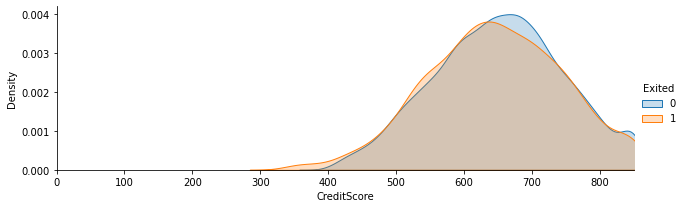

In [249]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, df["CreditScore"].max()))
facet.add_legend()
plt.show()

There are high exited customers beteen 600 and 700 creditscore

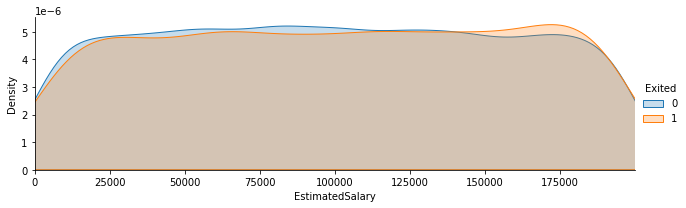

In [250]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"EstimatedSalary",shade= True)
facet.set(xlim=(0, df["EstimatedSalary"].max()))
facet.add_legend()
plt.show()

Estimated Salary between classes tend to overlap and there is no clear pattern exists

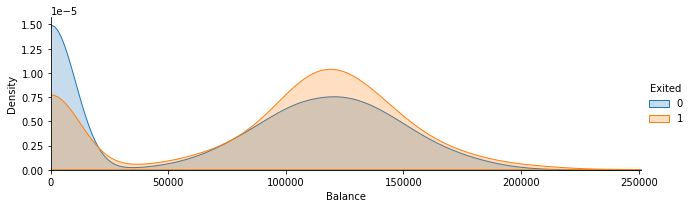

In [251]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, df["Balance"].max()))
facet.add_legend()
plt.show()

More exits observered between 100000 and 150000 balance

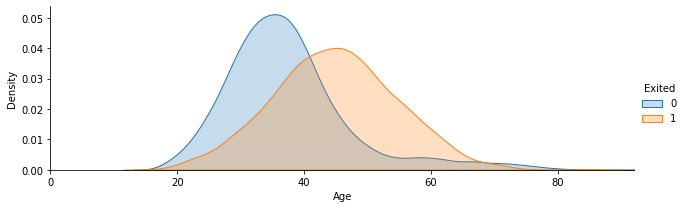

In [252]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, df["Age"].max()))
facet.add_legend()
plt.show()

High exited customers are between age group of 40 and 50

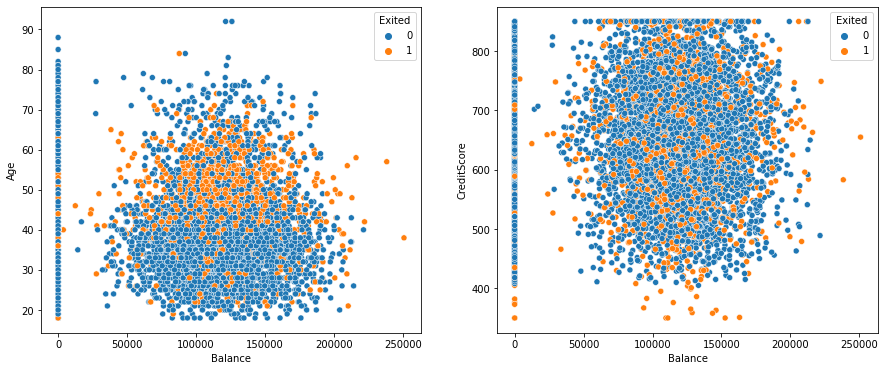

In [253]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "Balance", y = "Age", data = df, hue="Exited", ax = ax[0])
sns.scatterplot(x = "Balance", y = "CreditScore", data = df, hue="Exited", ax = ax[1])

* There is high concentration of customer exits observered between 40 and 60 age group with balance between 50000 and 200000
* With balance between 100000 and 200000 and credit score between 600 and 700 there seems to be more exits

# 5. <a name = "link5"></a>Data Pre-processing

### 5.1 Splitting Data

In [254]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

### 5.2 Encoding categorical variables

In [255]:
X =pd.get_dummies(X,drop_first=True)

### 5.4 Train Test Split

In [256]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
print(X_train.shape, X_test.shape)

(7000, 11) (3000, 11)


### 5.3 Feature Scaling

In [257]:
# pply feature scaling to all the features of both the training and the test set.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Scaling fitted only to training set to avoid information leakage.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 6. <a name = "link6"></a> Problem Statement Model Building

### 6.1 Model evaluation criterion

### Model can make wrong predictions as:
* Predicting a customer will churn, but the customer did not churn
* Predicting a transaction  will not churn and  customer did churn

### Which case is more important? 
* Predicting that will not churn but customer churned. In this case the bank wasted resources in targetting the wrong customers

### How to reduce this loss i.e need to reduce False Negative?
* Company  would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the Company can identify the actual customer who will exit

In [258]:
#Confusion Matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

# 7. <a name = "link7"></a> Model building - Neural Network

### 7.1 Deep neural network

Model-1 

- We will use a simple NN made of 5 fully-connected layers with ReLu activation. The NN takes a vector of length 11 as input. This represents the information related to each transactions, ie each line with 11 columns from the dataset. For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either as not exit (0) or exit (1).
- a dropout step is included to prevent overfitting.

### 7.2 Creating a model

Keras model object can be created with Sequential class

In [259]:
#initialize the model
model = Sequential()

### 7.3 Adding layers [layers and activations]

Keras layers can be added to the model. Since this is a classification problem, sigmoid layer (softmax for multi-class problems) is added

In [260]:

# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=16, input_dim = 11,activation='relu'))   # input of 11 columns as shown above
# hidden layer
model.add(Dense(units=24,activation='relu'))
#Adding Dropout to prevent overfitting 
model.add(Dropout(0.5))
model.add(Dense(24,activation='relu'))
model.add(Dense(24,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (exit or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='sigmoid'))                        # binary classification exit or not

### 7.4 Model compile [optimizers and loss functions]

Keras model should be "compiled" prior to training

Types of loss (function) and optimizer should be designated

In [261]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [262]:
###Let's print the summary of the model 

In [263]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 16)                192       
_________________________________________________________________
dense_40 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_12 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_42 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 25        
Total params: 1,825
Trainable params: 1,825
Non-trainable params: 0
____________________________________________________

### 7.5 Training [Forward pass and Backpropagation]

Training the model

In [264]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
374/374 [==============================] - 2s 3ms/step - loss: 0.5009 - accuracy: 0.7929 - val_loss: 0.4580 - val_accuracy: 0.7864
Epoch 2/10
374/374 [==============================] - 1s 2ms/step - loss: 0.4491 - accuracy: 0.8005 - val_loss: 0.4333 - val_accuracy: 0.8107
Epoch 3/10
374/374 [==============================] - 1s 3ms/step - loss: 0.4307 - accuracy: 0.8104 - val_loss: 0.4140 - val_accuracy: 0.8214
Epoch 4/10
374/374 [==============================] - 1s 2ms/step - loss: 0.4179 - accuracy: 0.8196 - val_loss: 0.4133 - val_accuracy: 0.8229
Epoch 5/10
374/374 [==============================] - 1s 2ms/step - loss: 0.4135 - accuracy: 0.8234 - val_loss: 0.4060 - val_accuracy: 0.8221
Epoch 6/10
374/374 [==============================] - 1s 2ms/step - loss: 0.4066 - accuracy: 0.8264 - val_loss: 0.4080 - val_accuracy: 0.8236
Epoch 7/10
374/374 [==============================] - 1s 2ms/step - loss: 0.4013 - accuracy: 0.8304 - val_loss: 0.3939 - val_accuracy: 0.8243
Epoch 

### 7.6 Plotting the train and test loss

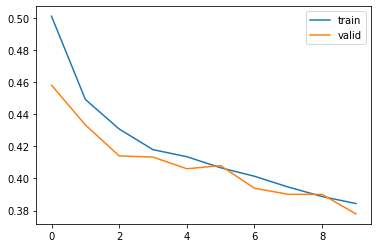

In [265]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

### 7.7 Evaluation
Keras model can be evaluated with evaluate() function

Evaluation results are contained in a list

In [266]:
nn_score = model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.3988 - accuracy: 0.8440


- The model achieves an accuracy of 85% We have to compare with other models to see if we can improve the accuracy further

In [267]:
print(nn_score)

[0.39882296323776245, 0.843999981880188]


In [270]:
y_pred1 = model.predict(X_test)
y_pred1

array([[0.04591864],
       [0.1470223 ],
       [0.1512717 ],
       ...,
       [0.537257  ],
       [0.06151891],
       [0.15355915]], dtype=float32)

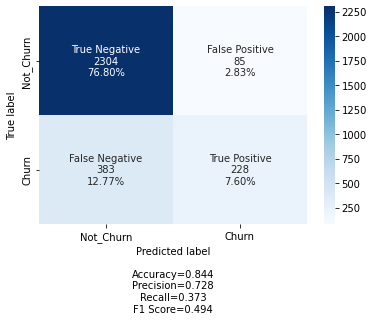

In [271]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Churn','Churn']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### 7.8 Conclusion
There are 383(12.77%) incorrect predictions that customers stay will stay in the bank.
There are 101 false positives which is not big compared to the false positive. Since our objective is to reduce the false negatives and detect as many customer churn prediction as possible, we need to find ways to further reduce the number of false negative.

# 8. <a name = "link8"></a> Model Building - XG Boost

In [272]:
xgb  = XGBClassifier(max_depth = 10,random_state = 10, n_estimators=220, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.9)

xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
xgb_score = accuracy_score(pred, y_test)
xgb_score

0.857

Accuracy is almost same as the NN

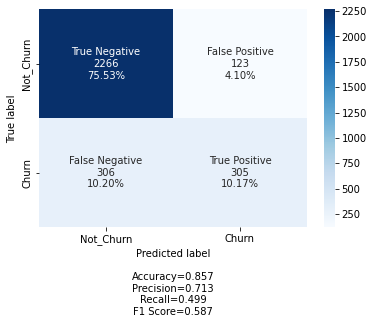

In [273]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred2 = xgb.predict(X_test)
for i in range(len(y_test)):
    if y_pred2[i]>0.5:
        y_pred2[i]=1 
    else:
        y_pred2[i]=0



cm2=confusion_matrix(y_test, y_pred2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Churn','Churn']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

XGBosst gave almost accuracy as Initial Neural Network model but the false negative predictions have reduced slightly from 383 to 306 which is inline with our objective. But we still need to try to optimize this futher to reduce the false negative cases

# 9. <a name = "link9"></a>DNN Model Performance Improvement with Oversampling

In [274]:
# Oversampling the underrepresented class with SMOTE
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over= sm.fit_resample(X_train, y_train)

In [275]:
#initialize the model
model1 = Sequential()

In [276]:

# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model1.add(Dense(units=16, input_dim = 11,activation='relu'))   # input of 29 columns as shown above
# hidden layer
model1.add(Dense(units=24,activation='relu'))
#Adding Dropout to prevent overfitting 
model1.add(Dropout(0.5))
model1.add(Dense(24,activation='relu'))
model1.add(Dense(24,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (Churn or not)
# We use the sigmoid because we want probability outcomes
model1.add(Dense(1,activation='sigmoid'))        

In [277]:
# Create optimizer with default learning rate
# Compile the model
model1.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [278]:
#fitting the model
history=model1.fit(X_train_over,y_train_over,batch_size=15,epochs=15,validation_split=0.2)

Epoch 1/15
595/595 [==============================] - 2s 3ms/step - loss: 0.5963 - accuracy: 0.6781 - val_loss: 0.7387 - val_accuracy: 0.5964
Epoch 2/15
595/595 [==============================] - 1s 2ms/step - loss: 0.5298 - accuracy: 0.7346 - val_loss: 0.7019 - val_accuracy: 0.6417
Epoch 3/15
595/595 [==============================] - 1s 2ms/step - loss: 0.4905 - accuracy: 0.7595 - val_loss: 0.6538 - val_accuracy: 0.6861
Epoch 4/15
595/595 [==============================] - 1s 2ms/step - loss: 0.4666 - accuracy: 0.7798 - val_loss: 0.5786 - val_accuracy: 0.7408
Epoch 5/15
595/595 [==============================] - 2s 3ms/step - loss: 0.4554 - accuracy: 0.7917 - val_loss: 0.6720 - val_accuracy: 0.6664
Epoch 6/15
595/595 [==============================] - 2s 3ms/step - loss: 0.4476 - accuracy: 0.7951 - val_loss: 0.7001 - val_accuracy: 0.6538
Epoch 7/15
595/595 [==============================] - 1s 2ms/step - loss: 0.4400 - accuracy: 0.8003 - val_loss: 0.5975 - val_accuracy: 0.7117
Epoch 

In [279]:
nn_ovr_score = model1.evaluate(X_test, y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.3879 - accuracy: 0.8290


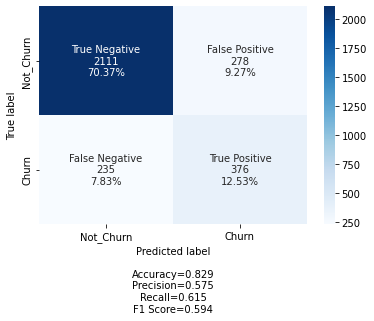

In [280]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model1.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Churn','Churn']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Neural Network with oversampling has accuracy that is lower than the intial NN model. But the false negative cases have reduced significantly from the intial model from 12% to 8%.

# 10. <a name = "link10"></a> DNN Model Performance Improvement with Hyperparameter Tuning

### 10.1 Tuning the model with Early stopping and Weight Initialization to see if the accuracy improves further 

In [281]:
#Training Multi-layer perceptron with 2 hidden layers

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
#Initializing the weights uisng hue_normal 
Model2.add(Dense(65, input_dim = 11, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=1)


Epoch 1/40
8/8 [==============================] - 1s 83ms/step - loss: 2.0876 - accuracy: 0.2973 - val_loss: 1.1357 - val_accuracy: 0.2557
Epoch 2/40
8/8 [==============================] - 0s 8ms/step - loss: 1.3164 - accuracy: 0.4407 - val_loss: 0.6517 - val_accuracy: 0.6336
Epoch 3/40
8/8 [==============================] - 0s 9ms/step - loss: 0.9104 - accuracy: 0.6007 - val_loss: 0.5784 - val_accuracy: 0.7764
Epoch 4/40
8/8 [==============================] - 0s 9ms/step - loss: 0.8113 - accuracy: 0.6875 - val_loss: 0.6049 - val_accuracy: 0.7864
Epoch 5/40
8/8 [==============================] - 0s 8ms/step - loss: 0.8000 - accuracy: 0.7221 - val_loss: 0.6009 - val_accuracy: 0.7864
Epoch 6/40
8/8 [==============================] - 0s 9ms/step - loss: 0.7244 - accuracy: 0.7430 - val_loss: 0.5663 - val_accuracy: 0.7871
Epoch 7/40
8/8 [==============================] - 0s 9ms/step - loss: 0.7162 - accuracy: 0.7323 - val_loss: 0.5269 - val_accuracy: 0.7886
Epoch 8/40
8/8 [=================

In [282]:
nn_hyper_score = Model2.evaluate(X_test, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.8117


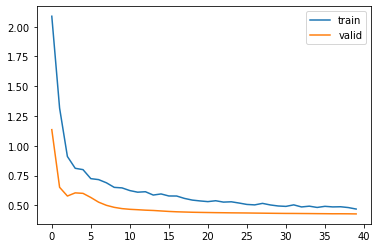

In [283]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


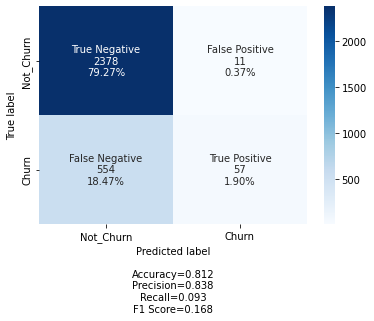

In [284]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = Model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Churn','Churn']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Conclusion:**

As you can see here the Recall of the model is not improved and it is worse than the intial NN model as well as the XGBoost but the precision is changed.Let's try weighted loss for imbalance dataset

### Weighted loss to account for large class imbalance in train dataset
- we will adjust the class imbalance by giving additional weight to the loss associated to errors made on customer churn detection.

- We will use our initial ANN model and apply weighted loss


 Let's review the process:

In [285]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6279153211338356, 1: 2.4544179523141656}

- The class 'Churn' (y=1) is assigned a weight of 290 vs 0.5 for the class 'not Churn' due to the very low prevalence we detected during data exploration. This allows the model to give more importance to the errors made on churn cases during training.

In [286]:
model.fit(X_train,y_train,batch_size=15,epochs=5, class_weight=class_weights, shuffle=True)

Epoch 1/5
467/467 [==============================] - 2s 3ms/step - loss: 0.5118 - accuracy: 0.7829
Epoch 2/5
467/467 [==============================] - 1s 3ms/step - loss: 0.4876 - accuracy: 0.7833
Epoch 3/5
467/467 [==============================] - 1s 3ms/step - loss: 0.4864 - accuracy: 0.7806
Epoch 4/5
467/467 [==============================] - 2s 3ms/step - loss: 0.4792 - accuracy: 0.7859
Epoch 5/5
467/467 [==============================] - 1s 3ms/step - loss: 0.4822 - accuracy: 0.7836


In [287]:
score_weighted = model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 1ms/step - loss: 0.4679 - accuracy: 0.7937


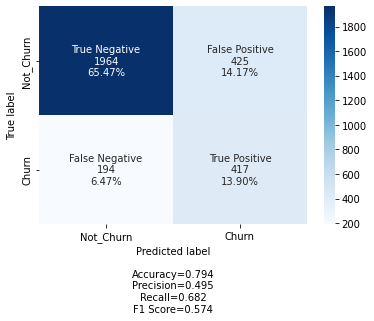

In [288]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Churn','Churn']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

False negative cases dropped further from the intial NN model. But accuracy is much lower than the other models

# 11. <a name = "link11"></a> Conclusion

#### Comparison of different Models

In [289]:
my_dict = {"Initial Neural Network": nn_score[1], "XGBoost": xgb_score, "Neural Network with oversampling": nn_ovr_score[1], "Neural Network with Hyperparameter Tuning": nn_hyper_score[1]}
comparison_frame = pd.DataFrame([my_dict])
comparison_frame

,Initial Neural Network,XGBoost,Neural Network with oversampling,Neural Network with Hyperparameter Tuning
0,0.84,0.86,0.83,0.81


As you can see from the above comparison, XGBoost has given the highest accuracy score. Oversampling with Smote did not yield better accuracy but it was able to reduce the False negative cases.However, applying weighted loss with the initial neural network model was able to reduce the false negative cases even further. There is still  lot of scope of  improvements  as follows:

1) Threshold can be tuned to get the optimal value 

2) Resampling techniques can be applied to balanced the data and then train the model 

3) Hyperparameter tuning can be applied to tune the different Hyperparameters

4) we can try different optimizers other than Adam to see if that yield better predictions


Since our objectiv is to reduce the false negative cases and improve the recall score We can select the Model(Initial Neural Netork with Weighted loss as our final model based on the above analysis 